In [19]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [7]:
data = pd.read_csv (r"E:\UoB\Semester 1\DAPM\Assignments\Assignment 2\CSV Files Step by Step\Step 3 Clustering.csv")
data

,Serial,Gender,Age,Height,Weight,family_history,Meals,Smoker,Alcohol
0,A001,Female,21.000000,1.620000,64.000000,1,3,0,1
1,A002,Female,21.000000,1.520000,56.000000,1,3,1,3
2,A003,Male,23.000000,1.800000,77.000000,1,3,0,5
3,A004,Male,27.000000,1.800000,87.000000,0,3,0,5
4,A005,Male,22.000000,1.780000,89.800000,0,1,0,3
...,...,...,...,...,...,...,...,...,...
2105,A2106,Female,20.976842,1.710730,131.408528,1,3,0,3
2106,A2107,Female,21.982942,1.748584,133.742943,1,3,0,3
2107,A2108,Female,22.524036,1.752206,133.689352,1,3,0,3
2108,A2109,Female,24.361936,1.739450,133.346641,1,3,0,3


In [8]:
# Select the numeric columns for clustering
numeric_data = data[['Age','Height','Weight', 'family_history', 'Meals', 'Smoker', 'Alcohol']]

In [9]:
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(numeric_data)
data_scaled

array([[-0.52188343, -0.875153  , -0.86212169, ...,  0.38574908,
        -0.14593558, -1.42225507],
       [-0.52188343, -1.94755166, -1.16760393, ...,  0.38574908,
         6.85233869,  0.52389162],
       [-0.20671742,  1.05516459, -0.36571306, ...,  0.38574908,
        -0.14593558,  2.47003831],
       ...,
       [-0.28172126,  0.54262237,  1.79898567, ...,  0.38574908,
        -0.14593558,  0.52389162],
       [ 0.00790055,  0.4058272 ,  1.78589916, ...,  0.38574908,
        -0.14593558,  0.52389162],
       [-0.10197058,  0.39924267,  1.7907105 , ...,  0.38574908,
        -0.14593558,  0.52389162]])

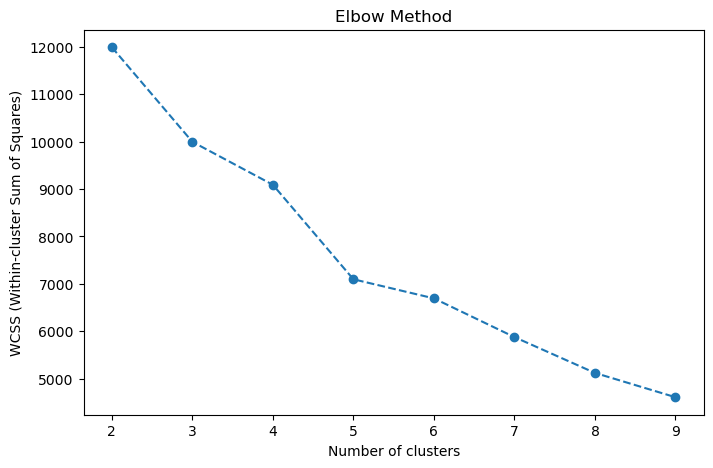

In [10]:
# Determine the optimal number of clusters (K)
wcss = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 5))
plt.plot(range(2, 10), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within-cluster Sum of Squares)')
plt.show()

In [31]:
# Choose the optimal number of clusters (K)
k = 5  # You can choose based on the elbow plot

# Perform K-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)
# Print the cluster of each "Serial"
for index, row in data.iterrows():
    print(f"Serial: {row['Serial']} is in Cluster {row['Cluster']}")

Serial: A001 is in Cluster 1
Serial: A002 is in Cluster 4
Serial: A003 is in Cluster 3
Serial: A004 is in Cluster 2
Serial: A005 is in Cluster 0
Serial: A006 is in Cluster 2
Serial: A007 is in Cluster 1
Serial: A008 is in Cluster 2
Serial: A009 is in Cluster 3
Serial: A010 is in Cluster 1
Serial: A011 is in Cluster 3
Serial: A012 is in Cluster 2
Serial: A013 is in Cluster 3
Serial: A014 is in Cluster 0
Serial: A015 is in Cluster 1
Serial: A016 is in Cluster 3
Serial: A017 is in Cluster 0
Serial: A018 is in Cluster 4
Serial: A019 is in Cluster 0
Serial: A020 is in Cluster 1
Serial: A021 is in Cluster 4
Serial: A022 is in Cluster 1
Serial: A023 is in Cluster 0
Serial: A024 is in Cluster 3
Serial: A025 is in Cluster 4
Serial: A026 is in Cluster 0
Serial: A027 is in Cluster 2
Serial: A028 is in Cluster 3
Serial: A029 is in Cluster 2
Serial: A030 is in Cluster 2
Serial: A031 is in Cluster 0
Serial: A032 is in Cluster 2
Serial: A033 is in Cluster 0
Serial: A034 is in Cluster 2
Serial: A035 i

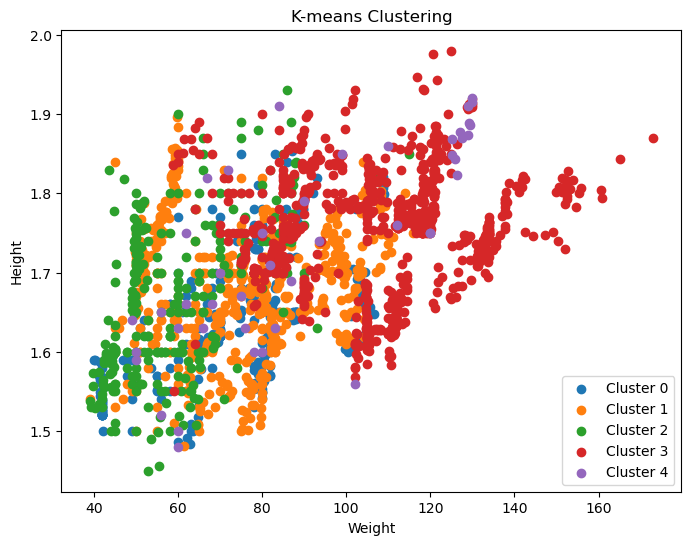

In [32]:
# Visualize the clusters in the original feature space
plt.figure(figsize=(8, 6))

for cluster in range(k):
    plt.scatter(data[data['Cluster'] == cluster]['Weight'], data[data['Cluster'] == cluster]['Height'], label=f'Cluster {cluster}')

plt.title('K-means Clustering')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.legend()
plt.show()

In [30]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.spatial.distance import pdist
import numpy as np

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(data_scaled, data['Cluster'])
print(f"Davies-Bouldin Index: {db_index}")

# Calculate Silhouette Score
silhouette_avg = silhouette_score(data_scaled, data['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

# Function to calculate Dunn Index
def dunn_index(data_scaled, labels):
    unique_clusters = np.unique(labels)
    inter_cluster_distances = []
    intra_cluster_distances = []
    
    # Calculate inter-cluster distances (minimum distance between clusters)
    for i in unique_clusters:
        for j in unique_clusters:
            if i < j:
                cluster_i = data_scaled[labels == i]
                cluster_j = data_scaled[labels == j]
                min_distance = np.min(pdist(np.vstack([cluster_i, cluster_j]), 'euclidean'))
                inter_cluster_distances.append(min_distance)
    
    # Calculate intra-cluster distances (maximum distance within a cluster)
    for cluster in unique_clusters:
        cluster_data = data_scaled[labels == cluster]
        max_distance = np.max(pdist(cluster_data, 'euclidean'))
        intra_cluster_distances.append(max_distance)
    
    dunn = min(inter_cluster_distances) / max(intra_cluster_distances)
    return dunn

# Calculate Dunn Index
# Ensure labels are numpy array to match dimensions of scaled data
labels = np.array(data['Cluster'])
dunn_value = dunn_index(data_scaled, labels)
print(f"Dunn Index: {dunn_value}")

Davies-Bouldin Index: 1.6858459328515811
Silhouette Score: 0.257811731261567
Dunn Index: 0.0
